In [5]:
# encoding=utf8

In [6]:
import os
import numpy as np
import pandas as pd # Data frames

from scipy.stats import linregress

import matplotlib.pyplot as plt # Visuals
%matplotlib inline

# Linear Regression Analysis

Consumer Price Inflation vs Communication Sector

https://www.ons.gov.uk/economy/inflationandpriceindices/bulletins/consumerpriceinflation/previousReleases

Why is it always so complicated to get data. A quick search on the interwebs yields: http://www.ons.gov.uk/ons/rel/cpi/consumer-price-indices/october-2012/cpi-time-series-data.html

But this turns out to be so big that it does not open in a spreadsheet programme (if you take CSV). In addition all the series descriptions are mixed in at the bottom of the file so this is not machine processable!

Let's try instead to go for the series selector to try and break it down: http://www.ons.gov.uk/ons/datasets-and-tables/data-selector.html?dataset=mm23

But this is about 20 different series - which one do you want? Make an educated guess and repeat each time you're wrong!

In [7]:
#data_URL1 = 'https://www.ons.gov.uk/generator?format=csv&uri=/peoplepopulationandcommunity/leisureandtourism/timeseries/gmat/ott'
#data_URL2 = 'https://www.ons.gov.uk/generator?format=csv&uri=/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/timeseries/bbfw/lms'

In [8]:
#data cleansing for first data set

names = ("Year","Number_Of_Visitors")
data1 = "../../DataSets/pybk019master/series-130318.csv"
data1 = pd.read_csv(data1, names=names,sep=",",skiprows=8)
data1

,Year,Number_Of_Visitors
0,1986,13897
1,1987,15566
2,1988,15799
3,1989,17339
4,1990,18018
5,1991,17124
6,1992,18533
7,1993,19867
8,1994,20730
9,1995,23520


In [9]:
#We need only year wise consolidated data
#We will extract the consolidated data from our above data

data1_y=data1[:29]
data1_y

,Year,Number_Of_Visitors
0,1986,13897
1,1987,15566
2,1988,15799
3,1989,17339
4,1990,18018
5,1991,17124
6,1992,18533
7,1993,19867
8,1994,20730
9,1995,23520


In [10]:
# Data Cleaning for second data set

name1=("Year","No_Of_Labour_Disputes")
data2 = "../../DataSets/pybk019master/series-130318_2.csv"
data2 = pd.read_csv(data2,names=name1,sep=",",skiprows=8)
data2

,Year,No_Of_Labour_Disputes
0,1891,6809
1,1892,7382
2,1893,30439
3,1894,9506
4,1895,5701
5,1896,3565
6,1897,10327
7,1898,15257
8,1899,2503
9,1900,3088


In [11]:
#We want to match our data2 with our data 1.
# Data1 starts with 1986 and ends with 2016.
#Hence we will extract the consolidated values from data2 corresponding to data1 year.
data2_y=data2[95:124]
data2_y=data2_y.reset_index(drop=True)
data2_y

,Year,No_Of_Labour_Disputes
0,1986,1920
1,1987,3546
2,1988,3702
3,1989,4128
4,1990,1903
5,1991,761
6,1992,528
7,1993,649
8,1994,278
9,1995,415


In [12]:
data_final_y = pd.merge(data1_y,data2_y,on='Year')
data_final_y

,Year,Number_Of_Visitors,No_Of_Labour_Disputes
0,1986,13897,1920
1,1987,15566,3546
2,1988,15799,3702
3,1989,17339,4128
4,1990,18018,1903
5,1991,17124,761
6,1992,18533,528
7,1993,19867,649
8,1994,20730,278
9,1995,23520,415


In [13]:
data_final_y.corr()

,Number_Of_Visitors,No_Of_Labour_Disputes
Number_Of_Visitors,1.000000,-0.560749
No_Of_Labour_Disputes,-0.560749,1.000000


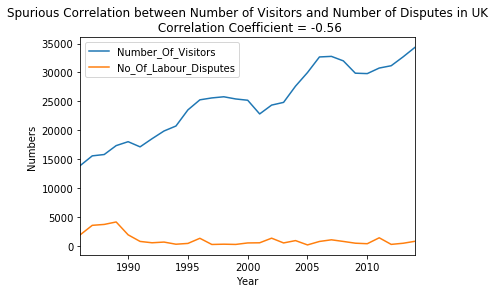

In [14]:
data_final_y['Year']=data_final_y['Year'].astype('int64')

data_final1_y=pd.DataFrame(data_final_y)
data_final1_y=data_final1_y.drop('Year',axis=1,)

plt.figure()
data_final1_y.plot(x=data_final_y['Year'],legend=True,title='Spurious Correlation between Number of Visitors and Number of Disputes in UK'+'\n Correlation Coefficient = -0.56')
plt.ylabel('Numbers')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size

In [15]:
#########For Months################

data1_m=data1[157:]
data1_m=data1_m.reset_index(drop=True)
data1_m

,Year,Number_Of_Visitors
0,2017 Q3,9570
1,1986 JAN,1144
2,1986 FEB,1195
3,1986 MAR,1139
4,1986 APR,1116
5,1986 MAY,1143
6,1986 JUN,1090
7,1986 JUL,1143
8,1986 AUG,1253
9,1986 SEP,1161


In [16]:
data2_m=data2[784:1165]
data2_m=data2_m.reset_index(drop=True)
data2_m

,Year,No_Of_Labour_Disputes
0,1986 JAN,217
1,1986 FEB,248
2,1986 MAR,184
3,1986 APR,145
4,1986 MAY,288
5,1986 JUN,170
6,1986 JUL,67
7,1986 AUG,67
8,1986 SEP,154
9,1986 OCT,167


In [17]:
data_final_m = pd.merge(data1_m,data2_m,on='Year')
data_final_m

,Year,Number_Of_Visitors,No_Of_Labour_Disputes
0,1986 JAN,1144,217
1,1986 FEB,1195,248
2,1986 MAR,1139,184
3,1986 APR,1116,145
4,1986 MAY,1143,288
5,1986 JUN,1090,170
6,1986 JUL,1143,67
7,1986 AUG,1253,67
8,1986 SEP,1161,154
9,1986 OCT,1194,167


In [18]:
data_final_m.corr()

,Number_Of_Visitors,No_Of_Labour_Disputes
Number_Of_Visitors,1.000000,-0.275096
No_Of_Labour_Disputes,-0.275096,1.000000


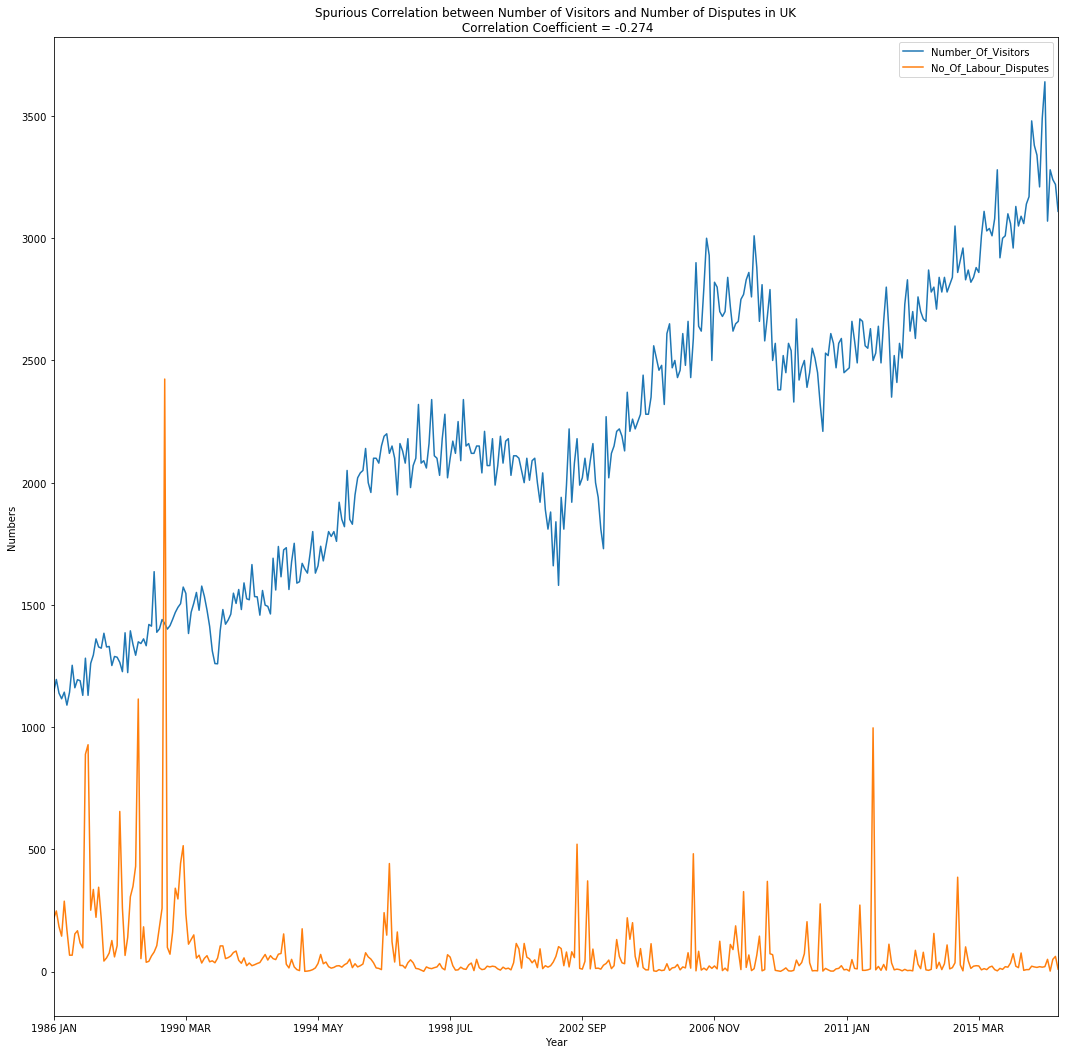

In [19]:
data_final1_m=pd.DataFrame(data_final_m)
data_final1_m=data_final1_m.drop('Year',axis=1,)

plt.figure()
data_final1_m.plot(x=data_final_m['Year'],legend=True,title='Spurious Correlation between Number of Visitors and Number of Disputes in UK'+'\n Correlation Coefficient = -0.274')
plt.ylabel('Numbers')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

In [20]:
#Calculations for Quaters

data_2_q=data_final1_m.drop('Number_Of_Visitors',axis=1,)
data_2_q= data_2_q[:378]
data_2_q

,No_Of_Labour_Disputes
0,217
1,248
2,184
3,145
4,288
5,170
6,67
7,67
8,154
9,167


In [21]:
a =[]
for i in data_2_q['No_Of_Labour_Disputes']:
    a = a + [i]
#print(a)
k =0
b=[]
for i in range(0,126):
    sum = a[k]+a[k+1]+a[k+2]
    k = k + 3
    b= b+ [sum]
print (b)
se = pd.Series(b)
#b = pd.DataFrame(b)

[649, 603, 288, 381, 2068, 903, 313, 263, 1020, 512, 1895, 274, 186, 549, 2594, 800, 1194, 393, 157, 159, 135, 263, 199, 164, 115, 85, 161, 165, 194, 199, 77, 180, 14, 118, 91, 54, 70, 101, 75, 168, 102, 262, 713, 226, 75, 97, 18, 45, 68, 90, 89, 36, 71, 70, 40, 61, 35, 32, 244, 188, 136, 121, 66, 203, 198, 157, 544, 424, 119, 69, 83, 229, 384, 281, 117, 124, 13, 43, 61, 41, 573, 92, 43, 47, 142, 204, 282, 412, 83, 156, 511, 9, 25, 54, 134, 243, 284, 22, 15, 44, 60, 296, 17, 1015, 55, 153, 25, 16, 95, 121, 21, 207, 149, 63, 416, 158, 69, 27, 48, 25, 73, 111, 89, 49, 55, 72]


In [22]:
data1_Q=data1[31:157]
data1_Q=data1_Q.reset_index(drop=True)
data1_Q

,Year,Number_Of_Visitors
0,1986 Q1,3477
1,1986 Q2,3349
2,1986 Q3,3557
3,1986 Q4,3514
4,1987 Q1,3674
5,1987 Q2,3985
6,1987 Q3,4035
7,1987 Q4,3872
8,1988 Q1,3778
9,1988 Q2,4004


In [23]:
#Final data for the Quater's
data2_Q=data1_Q
data2_Q['No_Of_Labour_Disputes']=se.values
data2_Q

,Year,Number_Of_Visitors,No_Of_Labour_Disputes
0,1986 Q1,3477,649
1,1986 Q2,3349,603
2,1986 Q3,3557,288
3,1986 Q4,3514,381
4,1987 Q1,3674,2068
5,1987 Q2,3985,903
6,1987 Q3,4035,313
7,1987 Q4,3872,263
8,1988 Q1,3778,1020
9,1988 Q2,4004,512


In [24]:
data2_Q.corr()

,Number_Of_Visitors,No_Of_Labour_Disputes
Number_Of_Visitors,1.000000,-0.398278
No_Of_Labour_Disputes,-0.398278,1.000000


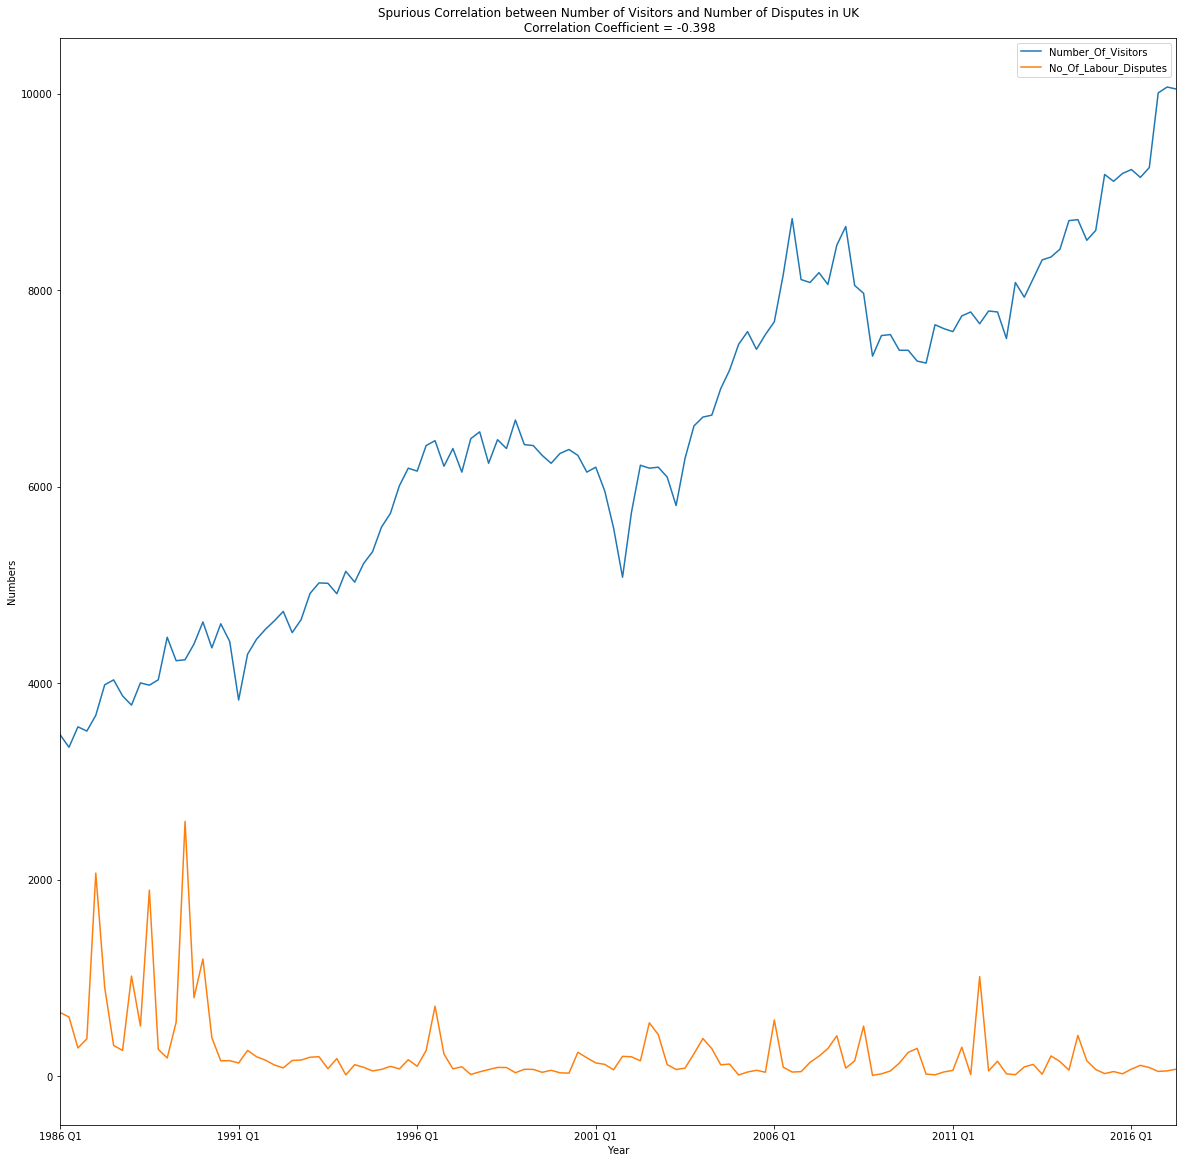

In [25]:
data_final1_q=pd.DataFrame(data2_Q)
data_final1_q=data_final1_q.drop('Year',axis=1,)

plt.figure()
data_final1_q.plot(x=data2_Q['Year'],legend=True,title='Spurious Correlation between Number of Visitors and Number of Disputes in UK'+'\n Correlation Coefficient = -0.398')
plt.ylabel('Numbers')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size